In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
cust_demo = pd.read_csv('cust_demographics.csv')
cust_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [70]:
claim = pd.read_csv('claims.csv')
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [71]:
# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.
df = pd.merge(right = claim,left = cust_demo, right_on = "customer_id", left_on = "CUST_ID",how = "outer")
df.drop(columns = ["customer_id"], inplace = True)
df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [72]:
# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.
df["DateOfBirth"] = pd.to_datetime(df.DateOfBirth, format = "%d-%b-%y")
df["claim_date"] = pd.to_datetime(df.claim_date, format = "%m/%d/%Y")
df["Contact"] = pd.to_numeric(df.Contact.str.replace("-",""),downcast='float')
df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,$25120,1.0,No


In [73]:
# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign
df["claim_amount"] = pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')
df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No


In [74]:
# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.
df["Flag"] = np.where(df.police_report=='Unknown',1,0)
df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,1


In [75]:
# 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.
df = df.groupby('CUST_ID').first().reset_index(drop = True)
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,1
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,0
1081,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,0
1082,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0


In [76]:
# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)
df.isna().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
Flag                    0
dtype: int64

In [77]:
df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].mean())
df['total_policy_claims'] = df['total_policy_claims'].fillna(df['total_policy_claims'].mode()[0])
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,1
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0
1081,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,0
1082,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0


In [78]:
# 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60
df["Age"] = (pd.DatetimeIndex(df.claim_date).year - pd.DatetimeIndex(df.DateOfBirth).year)
df.loc[(df.Age < 18) & (df.Age >0),'Age_Group'] = 'Children'
df.loc[(df.Age >=18) & (df.Age <30),'Age_Group'] = 'Youth'
df.loc[(df.Age >=30) & (df.Age <60),'Age_Group'] = 'Adult'
df.loc[(df.Age >=60),'Age_Group'] = 'Senior'
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0,40.0,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,46.0,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,1,29.0,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,0,47.0,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0,38.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0,-47.0,NaN
1081,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,0,-48.0,NaN
1082,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0,-45.0,NaN
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0,22.0,Youth


In [79]:
# 8. What is the average amount claimed by the customers from various segments?
df.groupby('Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12755.710938
1,Platinum,12370.138672
2,Silver,12271.163086


In [80]:
# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.
df[df.claim_date < "2018-09-10"].groupby('incident_cause')['claim_amount'].mean().reset_index()

,incident_cause,claim_amount
0,Crime,7317.803223
1,Driver error,13949.940430
2,Natural causes,7632.011719
3,Other causes,14550.931641
4,Other driver error,14556.168945


In [81]:
# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 
df.loc[(df.incident_cause.str.lower().str.contains("driver") & ((df.State == "TX") | (df.State == "DE") | (df.State == "AK"))),:].groupby("State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E33857ECD0>,
      dtype=object)

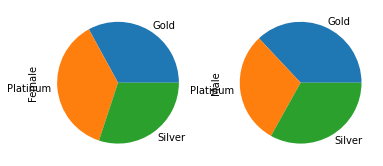

In [82]:
# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.
pie = df.groupby(['Segment','gender'])['claim_amount'].sum().reset_index()
pie.pivot(index="Segment", columns= "gender", values= "claim_amount").plot(kind = "pie", subplots= True, legend= False)

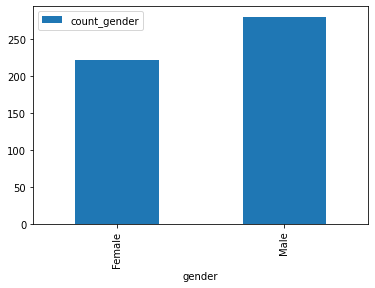

In [83]:
# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart
bar = df[(df.incident_cause.str.lower().str.contains("driver", na=False))].groupby(["gender"])[["gender"]].count().add_prefix("count_").reset_index()
pd.pivot_table(bar,index="gender",values="count_gender").plot(kind = "bar")

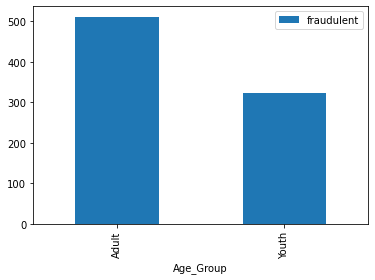

In [84]:
# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.
bar2 = df.groupby('Age_Group')['fraudulent'].count().reset_index()
pd.pivot_table(bar2,index="Age_Group",values="fraudulent").plot(kind = "bar")

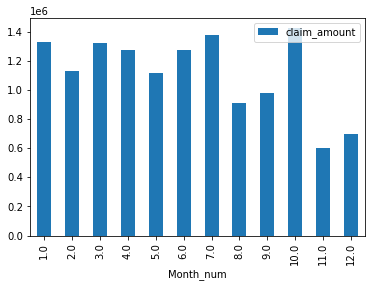

In [85]:
# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.
df['Month_num'] = pd.DatetimeIndex(df.claim_date).month
trend = df.groupby('Month_num')['claim_amount'].sum().reset_index()
pd.pivot_table(trend,index='Month_num',values="claim_amount").plot(kind = "bar")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E33927A970>,
      dtype=object)

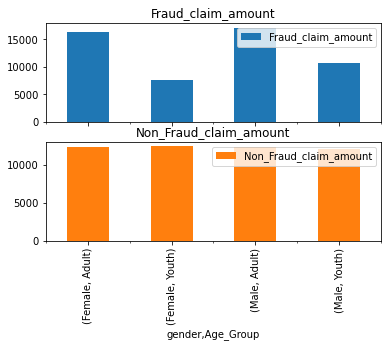

In [86]:
# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.
f = df[(df.fraudulent=="Yes")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Fraud_")
nf = df[(df.fraudulent=="No")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Non_Fraud_")
f_nf=round(pd.merge(f,nf,on=["gender","Age_Group"]),2)
f_nf.plot(kind="bar", subplots= True, legend= True)

In [87]:
# 16. Is there any similarity in the amount claimed by males and females?
# Two sample t-test:
# Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
# Data in each group must be obtained via a random sample from the population.
# Data in each group are normally distributed.
# Data values are continuous.
# The variances for the two independent groups are equal.
import scipy.stats as st
female = df['claim_amount'].loc[df['gender']=="Female"]
male = df['claim_amount'].loc[df['gender']=="Male"]
st.ttest_ind(female, male, equal_var=False)
# As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.

Ttest_indResult(statistic=-0.8854215435845393, pvalue=0.3761258643767492)

In [88]:
# 17. Is there any relationship between age category and segment?
# Chi Square test:
# H0 = No relation between category and segment
# Ha = There is a relationship between category and segment
c = pd.crosstab(df.Age_Group, df.Segment, margins = True)
st.chi2_contingency(observed= c)
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment

(2.367098046289905,
 0.8830349397478972,
 6,
 array([[177.89915966, 170.53781513, 162.56302521, 511.        ],
        [112.10084034, 107.46218487, 102.43697479, 322.        ],
        [290.        , 278.        , 265.        , 833.        ]]))

In [90]:
# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.
# Correlation
df['year'] = pd.DatetimeIndex(df.claim_date).year
CY = df.loc[df.year == 2018]["claim_amount"]
PY = df.loc[df.year == 2017]["claim_amount"]
CY.corr(other= PY)
# There is no correlation between Current Year and Previous year

nan

In [91]:
# 19. Is there any difference between age groups and insurance claims?
# ANOVA:
# H0 = No relation between category and segment
# Ha = There is a relationship between category and segment
a1 = df['total_policy_claims'].loc[df['Age_Group']=="Youth"]
a2 = df['total_policy_claims'].loc[df['Age_Group']=="Adult"]
st.f_oneway(a1,a2)
# Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

F_onewayResult(statistic=0.1604924667906191, pvalue=0.6888064919091371)

In [92]:
# 20. Is there any relationship between total number of policy claims and the claimed amount?
# Correlation
df.total_policy_claims.corr(other= df.claim_amount)
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.

-0.014788607436125315